In [1]:
from skimage import io
from skimage.color import rgb2gray
from pathlib import Path
import numpy as np

In [2]:
def salt_pepper(img):
  row, col, _ = img.shape
  
  number_of_pixels = np.random.randint(300, 1000)
  
  for _ in range(number_of_pixels):
    y_coord = np.random.randint(0, row - 1)
    x_coord = np.random.randint(0, col - 1)
    
    img[y_coord][x_coord] = 255
    
  number_of_pixels = np.random.randint(300, 1000)
  for _ in range(number_of_pixels):
    y_coord = np.random.randint(0, row - 1)
    x_coord = np.random.randint(0, col - 1)
    
    img[y_coord][x_coord] = 0
    
  return img

In [3]:
imgs = list(Path('data/train').glob('*.jpg'))[:6]
for img in imgs:
  image = io.imread(img)
  io.imsave(f'{img.stem}_original.jpg', image)
  noisy = salt_pepper(image)
  gray = rgb2gray(noisy)
  io.imsave(f'{img.stem}_gray.jpg', gray)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


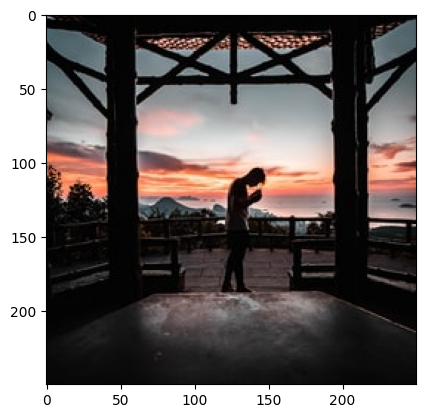

In [1]:
from matplotlib import pyplot as plt
from skimage import io


img = io.imread('data/train/--2IBUMom1I.jpg')
plt.imshow(img)

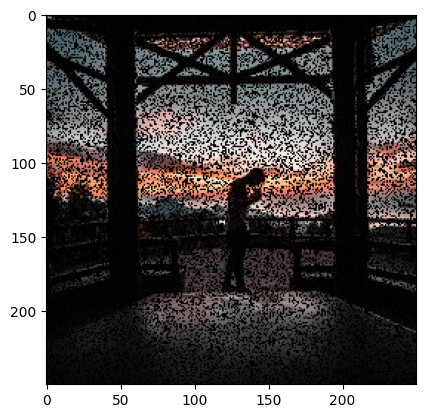

In [3]:
from utils import SaltAndPepper
import torch

sp = SaltAndPepper()

noisy = sp(torch.tensor(img, dtype=torch.long))
plt.imshow(noisy)

In [1]:
from dataset import make_dataloaders


d1, d2 = make_dataloaders()

for batch1 in d1:
  mean = batch1.mean()
  std = batch1.std()
  break
print(mean.item(), std.item())

0.42254525423049927 0.292397141456604


In [ ]:
tensor(0.4212, device='cuda:0') tensor(0.2884, device='cuda:0')
0.42254525423049927 0.292397141456604